In [2]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

from datetime import datetime

from sklearn import preprocessing
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV, train_test_split

In [3]:
#Set parameters to see all data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [13]:
# Load Train dataset
train_60 = pd.read_csv("../data/trainData.csv", delimiter = ";")
train_120 = pd.read_csv("../data/trainData.csv", delimiter = ";")

In [14]:
train_60.head().append(train_60.tail())

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
0,1,2.227640,10.237216,0.000000,2.569309,2.503424,-2.056384,0.537237,0.551614,0.889754,-0.752517,0.229630,0.266667,0.429630,2,29.000000,1.095588,6
1,1,2.481401,10.237216,0.000000,2.614335,2.503424,-2.056384,0.562851,0.550084,0.896373,-0.724675,0.288889,0.281481,0.340741,3,15.333333,1.117647,7
2,1,3.533260,11.265408,0.000000,3.291818,2.503424,-2.056384,0.551675,0.542847,0.795549,-0.692367,0.362963,0.303704,0.229630,3,10.333333,1.242647,9
3,1,4.412876,11.265408,0.000000,3.338501,2.503424,-2.056384,0.551977,0.525758,0.784108,-0.665086,0.370370,0.362963,0.118519,3,5.333333,1.352941,9
4,1,4.304404,11.265408,0.000000,3.439727,2.682240,-2.056384,0.638003,0.514284,0.836900,-0.686816,0.318519,0.407407,0.118519,3,5.333333,1.367647,9
355,12,33.331393,37.347222,29.594444,2.096329,0.900000,-0.844444,0.207025,0.228630,0.384184,-0.367718,0.392000,0.296000,0.000000,0,0.000000,5.000000,0
356,12,33.440961,37.347222,29.594444,2.012819,0.900000,-0.936111,0.209060,0.243186,0.383044,-0.404696,0.384000,0.336000,0.000000,0,0.000000,5.000000,0
357,12,33.377006,37.347222,27.827778,2.124085,0.794444,-0.936111,0.185990,0.254159,0.359785,-0.439953,0.352000,0.376000,0.000000,0,0.000000,5.000000,0
358,12,33.050287,37.347222,22.875000,2.671342,0.794444,-1.586111,0.186108,0.339817,0.365447,-0.511111,0.328000,0.416000,0.000000,0,0.000000,4.984127,1
359,12,32.426675,37.347222,14.752778,4.000708,0.794444,-1.672222,0.185129,0.456754,0.370903,-0.609942,0.320000,0.456000,0.000000,0,0.000000,4.920635,2


In [15]:
train_60.shape

(360, 18)

In [16]:
train_60.dtypes

Cycle            int64
meanVel        float64
maxVel         float64
minVel         float64
stdVel         float64
maxAccel       float64
maxDecel       float64
stdAccel       float64
stdDecel       float64
meanAccel      float64
meanDecel      float64
rAccel         float64
rDecel         float64
rStop          float64
stopCnt          int64
meanStopDur    float64
meanGear       float64
gearChg          int64
dtype: object

In [17]:
train_60_with_overlap = pd.read_csv("../data/201127_Cycles/data_60sec_overlap_10parts/trainData.csv", delimiter = ";")
train_60_with_overlap.head().append(train_60_with_overlap.tail())

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
0,1,1.947761,10.237216,0.000000,2.656727,2.503424,-2.056384,0.533322,0.602727,0.979912,-0.907119,0.221239,0.212389,0.513274,2,29.000000,1.105263,4
1,1,4.160609,11.265408,0.000000,3.322402,2.503424,-2.056384,0.562980,0.546802,0.808736,-0.683644,0.389381,0.362832,0.132743,2,7.500000,1.298246,9
2,1,5.587216,11.801856,0.000000,3.546036,2.682240,-1.654048,0.705970,0.411211,0.800311,-0.578358,0.362832,0.424779,0.035398,2,2.000000,1.552632,11
3,1,5.443300,11.801856,0.000000,4.068559,2.682240,-2.637536,0.721179,0.573390,0.770805,-0.720628,0.292035,0.442478,0.141593,3,5.333333,1.605263,11
4,1,4.562161,11.801856,0.000000,3.883047,2.235200,-2.637536,0.569402,0.557629,0.670560,-0.704088,0.309735,0.424779,0.221239,3,8.333333,1.447368,8
115,12,33.000904,37.347222,27.066667,3.011854,0.900000,-0.844444,0.244126,0.216356,0.417256,-0.354293,0.402439,0.268293,0.000000,0,0.000000,5.000000,0
116,12,33.661312,37.347222,29.594444,2.039236,0.900000,-0.844444,0.228588,0.228170,0.374552,-0.397024,0.378049,0.341463,0.000000,0,0.000000,5.000000,0
117,12,33.089592,37.347222,29.594444,2.094148,0.730556,-0.844444,0.158231,0.233338,0.320833,-0.398765,0.365854,0.329268,0.000000,0,0.000000,5.000000,0
118,12,32.652075,36.419444,29.161111,1.859121,0.711111,-0.936111,0.162939,0.253823,0.350992,-0.452533,0.341463,0.414634,0.000000,0,0.000000,5.000000,0
119,12,27.841466,36.419444,1.594444,8.997612,0.711111,-1.750000,0.169022,0.506176,0.364141,-0.888307,0.268293,0.524390,0.000000,0,0.000000,4.493976,4


In [18]:
train_60_with_overlap.shape

(120, 18)

In [19]:
train_60_with_overlap.dtypes

Cycle            int64
meanVel        float64
maxVel         float64
minVel         float64
stdVel         float64
maxAccel       float64
maxDecel       float64
stdAccel       float64
stdDecel       float64
meanAccel      float64
meanDecel      float64
rAccel         float64
rDecel         float64
rStop          float64
stopCnt          int64
meanStopDur    float64
meanGear       float64
gearChg          int64
dtype: object

In [20]:
train_60_with_overlap.meanVel.min(), train_60_with_overlap.meanVel.max()

(1.023989899, 35.10576259)

In [21]:
corr = train_60_with_overlap.corr()
corr

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
Cycle,1.000000,0.453557,0.553852,0.276102,0.324681,0.004840,0.057181,0.005050,0.053892,0.065991,-0.120517,0.229793,0.091674,-0.357404,-0.153286,-0.339659,0.460594,-0.049607
meanVel,0.453557,1.000000,0.944591,0.854643,-0.116302,-0.615467,0.414031,-0.646254,-0.535324,-0.641774,0.608507,0.059810,-0.141814,-0.675415,-0.662247,-0.567999,0.992730,-0.561112
maxVel,0.553852,0.944591,1.000000,0.703070,0.173534,-0.436851,0.238858,-0.474437,-0.340697,-0.460699,0.422863,0.204808,-0.043574,-0.655819,-0.606324,-0.540789,0.938883,-0.378102
minVel,0.276102,0.854643,0.703070,1.000000,-0.546758,-0.680567,0.564134,-0.706356,-0.679888,-0.662413,0.690027,-0.117619,-0.321006,-0.462747,-0.531664,-0.408972,0.834931,-0.686814
stdVel,0.324681,-0.116302,0.173534,-0.546758,1.000000,0.490775,-0.503230,0.504003,0.570777,0.450220,-0.515302,0.364627,0.395549,-0.065563,0.085395,0.000809,-0.101139,0.532810
maxAccel,0.004840,-0.615467,-0.436851,-0.680567,0.490775,1.000000,-0.669968,0.957156,0.753860,0.871877,-0.751034,0.243132,0.383808,0.330169,0.620908,0.197029,-0.614401,0.676575
maxDecel,0.057181,0.414031,0.238858,0.564134,-0.503230,-0.669968,1.000000,-0.655980,-0.914576,-0.634542,0.715069,-0.261122,-0.499178,-0.177223,-0.407959,-0.085632,0.411559,-0.714307
stdAccel,0.005050,-0.646254,-0.474437,-0.706356,0.504003,0.957156,-0.655980,1.000000,0.764532,0.924623,-0.790957,0.166495,0.424644,0.365292,0.594382,0.233804,-0.643834,0.682017
stdDecel,0.053892,-0.535324,-0.340697,-0.679888,0.570777,0.753860,-0.914576,0.764532,1.000000,0.762692,-0.888009,0.280705,0.479960,0.276591,0.435576,0.180428,-0.533701,0.721156
meanAccel,0.065991,-0.641774,-0.460699,-0.662413,0.450220,0.871877,-0.634542,0.924623,0.762692,1.000000,-0.861825,0.176907,0.429084,0.369563,0.540525,0.240558,-0.641965,0.709723


In [22]:
cr = corr.copy()
top_corr_columns = []
#Determine best correlate columns over 0.1
top_corr_columns = cr.loc[:, 'Cycle'][:-1]
best_accurate_columns = top_corr_columns[abs(top_corr_columns) > 0.1].sort_values(ascending=False)
best_accurate_columns

Cycle          1.000000
maxVel         0.553852
meanGear       0.460594
meanVel        0.453557
stdVel         0.324681
minVel         0.276102
rAccel         0.229793
meanDecel     -0.120517
stopCnt       -0.153286
meanStopDur   -0.339659
rStop         -0.357404
Name: Cycle, dtype: float64

In [23]:
bins_methods = [ "auto", "fd", "doane", "scott", "stone", "rice", "sturges", "sqrt"]

In [24]:
# https://stackoverflow.com/a/18364570
def get_columns_bins(column_name):
    all_bins = []

    for method in bins_methods:
        start = datetime.now()
        hist, bin_edges = np.histogram(column_name,bins=method)
        all_bins.append(bin_edges)
        print("Method : {:<7} - Running Time : {:<5} - Number of bins : {:<5} - Head : {} - Tail : {}".format(method,str(datetime.now()-start), len(bin_edges), bin_edges[:3], bin_edges[-3:-1]))
    return all_bins

In [25]:
# https://stackoverflow.com/a/18364570
def get_clustering_bins(s, quantile=0.3, n_samples=None):
    
    series = s.dropna().values.reshape(-1, 1)
    
    bandwidth = estimate_bandwidth(series, quantile=quantile, n_samples=n_samples)
    clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(series)

    d = pd.DataFrame(columns=['data_column', 'label_column'])

    d['data_column'] = series.reshape(-1)
    d['label_column'] = clustering.labels_
    
    sorted_vals = d.groupby('label_column')['data_column'].max().sort_values().values
    bins = np.insert(sorted_vals, [0] , [series.min()-1])
    bins[-1] = bins[-1] + 1
    
    return bins, range(bins.size-1)

#Apply bins to age column

In [26]:
train_60_with_overlap.columns

Index(['Cycle', 'meanVel', 'maxVel', 'minVel', 'stdVel', 'maxAccel', 'maxDecel', 'stdAccel', 'stdDecel', 'meanAccel', 'meanDecel', 'rAccel', 'rDecel', 'rStop', 'stopCnt', 'meanStopDur', 'meanGear', 'gearChg'], dtype='object')

In [27]:
train_60_with_overlap.meanVel.min()

1.023989899

In [28]:
def determine_bins(df, col):
    all_bins_col = []
    all_bins_col = get_columns_bins(df[col])
    
    _bin,label = get_clustering_bins(pd.Series(all_bins_col[0]))
    df.hist(bins=_bin)
    _bin
    
    len(_bin) , df[col].value_counts(bins=_bin)
    
    str1 = col
    str2 = "_category"
    col_name = str1 + str2
    
    df[col_name] = pd.cut(df[col], _bin).cat.codes
    df.head(5).append(df.tail(5))
    return df

In [30]:
train_60.columns

Index(['Cycle', 'meanVel', 'maxVel', 'minVel', 'stdVel', 'maxAccel', 'maxDecel', 'stdAccel', 'stdDecel', 'meanAccel', 'meanDecel', 'rAccel', 'rDecel', 'rStop', 'stopCnt', 'meanStopDur', 'meanGear', 'gearChg'], dtype='object')

In [31]:
cols = ['meanVel', 'maxVel', 'minVel', 'stdVel', 'maxAccel', 'maxDecel', 'stdAccel', 'stdDecel', 'meanAccel', 'meanDecel', 'rAccel', 'rDecel', 'rStop', 'stopCnt', 'meanStopDur', 'meanGear', 'gearChg']


In [32]:
train_60_with_overlap = train_60.copy()

In [29]:
#### Eserin yöntemi için alt cell'i çalıştır (for lu cell)

for col in cols:
    train_60_with_overlap = determine_bins(train_60_with_overlap, col)

In [33]:
train_60_with_overlap.head()

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
0,1,2.227640,10.237216,0.0,2.569309,2.503424,-2.056384,0.537237,0.551614,0.889754,-0.752517,0.229630,0.266667,0.429630,2,29.000000,1.095588,6
1,1,2.481401,10.237216,0.0,2.614335,2.503424,-2.056384,0.562851,0.550084,0.896373,-0.724675,0.288889,0.281481,0.340741,3,15.333333,1.117647,7
2,1,3.533260,11.265408,0.0,3.291818,2.503424,-2.056384,0.551675,0.542847,0.795549,-0.692367,0.362963,0.303704,0.229630,3,10.333333,1.242647,9
3,1,4.412876,11.265408,0.0,3.338501,2.503424,-2.056384,0.551977,0.525758,0.784108,-0.665086,0.370370,0.362963,0.118519,3,5.333333,1.352941,9
4,1,4.304404,11.265408,0.0,3.439727,2.682240,-2.056384,0.638003,0.514284,0.836900,-0.686816,0.318519,0.407407,0.118519,3,5.333333,1.367647,9


In [34]:
corr2 = train_60_with_overlap.corr()
corr2

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
Cycle,1.000000,0.458484,0.588134,0.263766,0.366766,0.043387,0.069296,0.044938,0.052083,0.069155,-0.086433,0.260542,-0.026432,-0.329779,-0.136213,-0.316834,0.465615,-0.028866
meanVel,0.458484,1.000000,0.940517,0.861337,-0.130435,-0.593660,0.390983,-0.616163,-0.502695,-0.654806,0.628517,0.078730,-0.260353,-0.668787,-0.710181,-0.564810,0.992978,-0.638483
maxVel,0.588134,0.940517,1.000000,0.702435,0.171382,-0.401152,0.215372,-0.428512,-0.293216,-0.452471,0.429927,0.241331,-0.142952,-0.655880,-0.663715,-0.535611,0.934045,-0.462433
minVel,0.263766,0.861337,0.702435,1.000000,-0.549750,-0.720580,0.572270,-0.743797,-0.684342,-0.725095,0.708312,-0.160606,-0.389706,-0.461488,-0.569782,-0.425893,0.841163,-0.745135
stdVel,0.366766,-0.130435,0.171382,-0.549750,1.000000,0.565666,-0.539574,0.580606,0.624830,0.538937,-0.536732,0.461009,0.371586,-0.072856,0.082440,0.022282,-0.112926,0.540601
maxAccel,0.043387,-0.593660,-0.401152,-0.720580,0.565666,1.000000,-0.668237,0.964261,0.764063,0.890722,-0.791888,0.250228,0.488141,0.326577,0.658358,0.195746,-0.593893,0.717326
maxDecel,0.069296,0.390983,0.215372,0.572270,-0.539574,-0.668237,1.000000,-0.661562,-0.920244,-0.653966,0.725884,-0.298278,-0.565231,-0.138519,-0.415411,-0.055339,0.392203,-0.681961
stdAccel,0.044938,-0.616163,-0.428512,-0.743797,0.580606,0.964261,-0.661562,1.000000,0.774613,0.935967,-0.824415,0.187053,0.519040,0.355038,0.661705,0.211644,-0.614625,0.762330
stdDecel,0.052083,-0.502695,-0.293216,-0.684342,0.624830,0.764063,-0.920244,0.774613,1.000000,0.790078,-0.892064,0.340708,0.538838,0.226972,0.480970,0.138007,-0.504343,0.773517
meanAccel,0.069155,-0.654806,-0.452471,-0.725095,0.538937,0.890722,-0.653966,0.935967,0.790078,1.000000,-0.889153,0.221555,0.531565,0.370436,0.671307,0.221513,-0.659317,0.819454


In [35]:
cr2 = corr2.copy()
top_corr_columns2 = []
#Determine best correlate columns over 0.1
top_corr_columns2 = cr2.loc[:, 'Cycle'][:-1]
best_accurate_columns2 = top_corr_columns2[abs(top_corr_columns2) > 0.1].sort_values(ascending=False)
best_accurate_columns2

Cycle          1.000000
maxVel         0.588134
meanGear       0.465615
meanVel        0.458484
stdVel         0.366766
minVel         0.263766
rAccel         0.260542
stopCnt       -0.136213
meanStopDur   -0.316834
rStop         -0.329779
Name: Cycle, dtype: float64

In [36]:
best_accurate_columns

Cycle          1.000000
maxVel         0.553852
meanGear       0.460594
meanVel        0.453557
stdVel         0.324681
minVel         0.276102
rAccel         0.229793
meanDecel     -0.120517
stopCnt       -0.153286
meanStopDur   -0.339659
rStop         -0.357404
Name: Cycle, dtype: float64

In [37]:
train_60_with_overlap.head(20)

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
0,1,2.227640,10.237216,0.0,2.569309,2.503424,-2.056384,0.537237,0.551614,0.889754,-0.752517,0.229630,0.266667,0.429630,2,29.000000,1.095588,6
1,1,2.481401,10.237216,0.0,2.614335,2.503424,-2.056384,0.562851,0.550084,0.896373,-0.724675,0.288889,0.281481,0.340741,3,15.333333,1.117647,7
2,1,3.533260,11.265408,0.0,3.291818,2.503424,-2.056384,0.551675,0.542847,0.795549,-0.692367,0.362963,0.303704,0.229630,3,10.333333,1.242647,9
3,1,4.412876,11.265408,0.0,3.338501,2.503424,-2.056384,0.551977,0.525758,0.784108,-0.665086,0.370370,0.362963,0.118519,3,5.333333,1.352941,9
4,1,4.304404,11.265408,0.0,3.439727,2.682240,-2.056384,0.638003,0.514284,0.836900,-0.686816,0.318519,0.407407,0.118519,3,5.333333,1.367647,9
5,1,4.610757,11.488928,0.0,3.546063,2.682240,-1.743456,0.734056,0.422139,0.898054,-0.623326,0.333333,0.392593,0.118519,3,5.333333,1.419118,11
6,1,5.438439,11.801856,0.0,3.489697,2.682240,-1.743456,0.723133,0.439962,0.833283,-0.618405,0.370370,0.400000,0.066667,3,3.000000,1.544118,13
7,1,5.825654,11.801856,0.0,3.556449,2.682240,-2.637536,0.661106,0.542964,0.740298,-0.681351,0.370370,0.429630,0.044444,3,2.000000,1.595588,14
8,1,5.546912,11.801856,0.0,3.878311,2.682240,-2.637536,0.671731,0.551306,0.753449,-0.711047,0.355556,0.392593,0.133333,3,6.000000,1.595588,14
9,1,5.312544,11.801856,0.0,4.006330,2.682240,-2.637536,0.671177,0.564871,0.755311,-0.712685,0.355556,0.385185,0.133333,3,6.000000,1.588235,12


In [38]:
train_60_with_overlap.shape

(360, 18)

In [39]:
X = train_60_with_overlap.iloc[:,1:18]
y = train_60_with_overlap.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [40]:
#make an array of min_samples_leaf to choose from 1 to 100
num_leafs = [1, 2, 3, 4, 5, 7, 10, 20, 50, 100]

In [41]:
#GridSearch to determine best parameters
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':num_leafs,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}


In [42]:
gsm = GridSearchCV(KNeighborsClassifier(),
                                 param_grid=param_grid,
                                 verbose = 1,
                                 cv=5,
                                 n_jobs = -1,
                                 refit=True)

In [43]:
now = datetime.now()
print(now)
gsm_result = gsm.fit(X_train, y_train)
end = datetime.now()
print(end)
print(end-now)

2020-12-06 22:45:35.467895
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    4.5s


2020-12-06 22:45:41.967687
0:00:06.499792


[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    6.5s finished


In [44]:
#print(gsm.best_score_) -> 0.4809523809523809

In [45]:
print(gsm.best_score_)

0.8147596153846155


In [46]:
best_params_ = gsm.best_params_
best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'manhattan',
 'weights': 'distance'}

In [47]:
print(gsm.best_estimator_)

KNeighborsClassifier(leaf_size=1, metric='manhattan', weights='distance')


In [49]:
n_neighbors = [1,3,5,7,9]

KNN for k =  1
[ 8  7 11  1 12  1 10  3  2  4  4  2  8 10  1  8  4  4  2  8  7  7 11  8
 10 12  3 11 12  6  4  1  9  3  5 11]


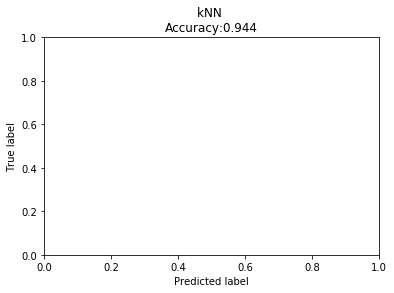

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       0.75      0.75      0.75         4
          12       1.00      1.00      1.00         3

    accuracy                           0.94        36
   macro avg       0.95      0.96      0.95        36
weighted avg       0.95      0.94      0.95        36

KNN for k =  3
[ 8  7 11  1 12  1 10  3  2  4  4  2  8 10  1  8  4  4  2  8  7  7  3  8
 10 12  3 11 12  6  4  1  9  3  5 11]


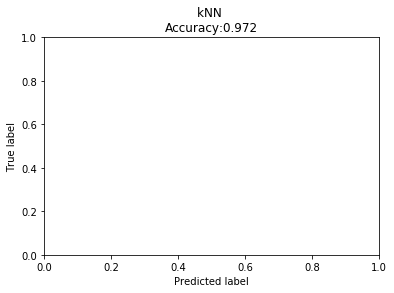

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       1.00      0.75      0.86         4
          12       1.00      1.00      1.00         3

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

KNN for k =  5
[ 8  7 11  1 12  1 10  3  2  4  4  2  8 10  1  8  4  4  2  8  7  7  3  8
 10 12  3  6 12  6  4  1  9  3  5 11]


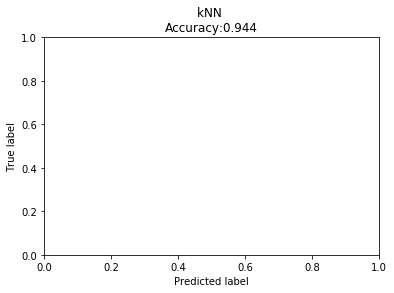

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       1.00      0.50      0.67         4
          12       1.00      1.00      1.00         3

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.93        36
weighted avg       0.97      0.94      0.94        36

KNN for k =  7
[ 8  7  6  1 12  1 10  3  2  4  4  2  8 10  1  8  4  4  2  8  7  7  3  8
 10 12  3  6  5  6  4  1  9  3  5 11]


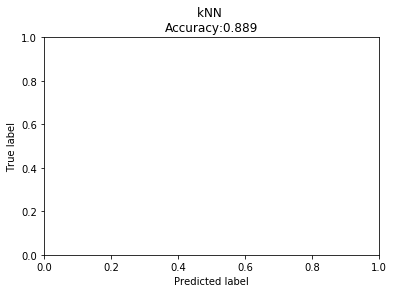

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       0.50      1.00      0.67         1
           6       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       1.00      0.25      0.40         4
          12       1.00      0.67      0.80         3

    accuracy                           0.89        36
   macro avg       0.88      0.91      0.85        36
weighted avg       0.95      0.89      0.88        36

KNN for k =  9
[ 8  7  6  1 12  2 10  3  2  4  4  2  8 10  1  8  4  4  2  8  7  7  3  8
 10 12  3  6  5  6  4  1  9  3  5 11]


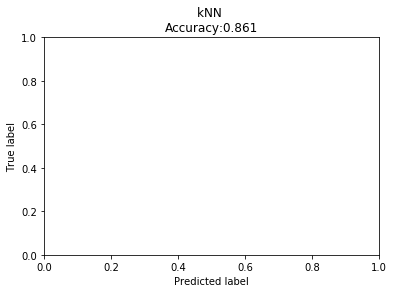

              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       0.50      1.00      0.67         1
           6       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       1.00      0.25      0.40         4
          12       1.00      0.67      0.80         3

    accuracy                           0.86        36
   macro avg       0.85      0.89      0.82        36
weighted avg       0.93      0.86      0.85        36



In [50]:
for k in n_neighbors:
    best_KNC = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                     weights='distance')
    
    best_KNC = best_KNC.fit(X_train, y_train)
    phase_predictor = best_KNC.predict(X_test)
    print("KNN for k = ", k)
    print(phase_predictor)

    cm = confusion_matrix(y_test, phase_predictor)
    plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, phase_predictor)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print(classification_report(y_test, phase_predictor))

In [51]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [52]:
# save the model to disk
filename = '../models/KNC_model_120_30.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

[ 8  7 11  1 12  1 10  3  2  4  4  2  8 10  1  8  4  4  2  8  7  7  3  8
 10 12  3 11 12  6  4  1  9  3  5 11]


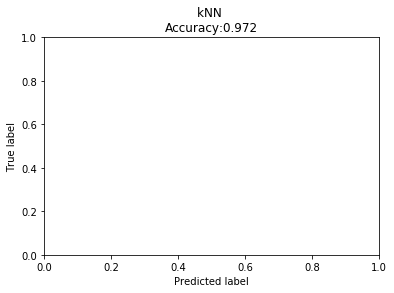

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       1.00      0.75      0.86         4
          12       1.00      1.00      1.00         3

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [53]:
best_KNC_2 = loaded_model.fit(X_train, y_train)
phase_predictor_2 = best_KNC_2.predict(X_test)
print(phase_predictor_2)

cm = confusion_matrix(y_test, phase_predictor_2)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, phase_predictor_2)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(y_test, phase_predictor_2))

In [54]:
print(classification_report(y_test, phase_predictor))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       0.50      1.00      0.67         1
           6       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       1.00      0.25      0.40         4
          12       1.00      0.67      0.80         3

    accuracy                           0.86        36
   macro avg       0.85      0.89      0.82        36
weighted avg       0.93      0.86      0.85        36



In [55]:
y_test.head()

227     8
209     7
307    11
14      1
334    12
Name: Cycle, dtype: int64

In [56]:
phase_predictor

array([ 8,  7,  6,  1, 12,  2, 10,  3,  2,  4,  4,  2,  8, 10,  1,  8,  4,
        4,  2,  8,  7,  7,  3,  8, 10, 12,  3,  6,  5,  6,  4,  1,  9,  3,
        5, 11])

In [57]:
y_test['phase_prediction'] = phase_predictor

In [58]:
result = X_test

In [59]:
result

,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
227,6.312147,14.108333,0.000000,4.626631,2.502778,-2.541667,0.653797,0.682584,1.012450,-0.987847,0.448000,0.384000,0.152000,4,4.750000,1.777778,17
209,4.801481,12.222222,0.000000,3.595940,2.361111,-2.361111,0.514454,0.571973,0.663580,-0.683160,0.422819,0.429530,0.127517,7,2.714286,1.486667,10
307,24.269953,27.055556,17.527778,2.450893,0.388889,-0.222222,0.080957,0.023074,0.196581,-0.173333,0.276596,0.177305,0.000000,0,0.000000,4.457746,3
14,4.330371,11.801856,0.000000,3.796899,2.235200,-2.637536,0.542009,0.533710,0.653926,-0.710474,0.318519,0.414815,0.214815,4,7.250000,1.404412,8
334,23.386839,33.827778,7.816667,7.386234,1.497222,-2.316667,0.377853,0.622408,0.629672,-0.626910,0.528000,0.256000,0.000000,0,0.000000,4.095238,8
24,1.548205,7.063232,0.000000,2.336149,1.475232,-1.475232,0.407093,0.345142,0.557906,-0.543154,0.185185,0.148148,0.622222,2,42.000000,1.088235,6
321,19.848396,34.361111,0.000000,11.283736,1.055556,-0.666667,0.257920,0.154328,0.443802,-0.258681,0.609929,0.226950,0.106383,1,15.000000,3.563380,6
84,24.690450,30.972222,14.861111,4.127072,1.027778,-1.694444,0.236824,0.305110,0.431239,-0.421540,0.401316,0.375000,0.000000,0,0.000000,4.366013,8
42,9.741422,15.694444,3.333333,3.782801,1.083333,-1.500000,0.298747,0.296970,0.549790,-0.450176,0.392593,0.466667,0.000000,0,0.000000,2.250000,10
103,12.170696,18.333333,3.333333,3.856943,1.444444,-1.472222,0.352809,0.482842,0.517407,-0.853299,0.576923,0.246154,0.000000,0,0.000000,2.610687,10


In [60]:
result['actual_phase'] = y_test

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
result['predictive_phase'] = phase_predictor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
result

,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg,actual_phase,predictive_phase
227,6.312147,14.108333,0.000000,4.626631,2.502778,-2.541667,0.653797,0.682584,1.012450,-0.987847,0.448000,0.384000,0.152000,4,4.750000,1.777778,17,8,8
209,4.801481,12.222222,0.000000,3.595940,2.361111,-2.361111,0.514454,0.571973,0.663580,-0.683160,0.422819,0.429530,0.127517,7,2.714286,1.486667,10,7,7
307,24.269953,27.055556,17.527778,2.450893,0.388889,-0.222222,0.080957,0.023074,0.196581,-0.173333,0.276596,0.177305,0.000000,0,0.000000,4.457746,3,11,6
14,4.330371,11.801856,0.000000,3.796899,2.235200,-2.637536,0.542009,0.533710,0.653926,-0.710474,0.318519,0.414815,0.214815,4,7.250000,1.404412,8,1,1
334,23.386839,33.827778,7.816667,7.386234,1.497222,-2.316667,0.377853,0.622408,0.629672,-0.626910,0.528000,0.256000,0.000000,0,0.000000,4.095238,8,12,12
24,1.548205,7.063232,0.000000,2.336149,1.475232,-1.475232,0.407093,0.345142,0.557906,-0.543154,0.185185,0.148148,0.622222,2,42.000000,1.088235,6,1,2
321,19.848396,34.361111,0.000000,11.283736,1.055556,-0.666667,0.257920,0.154328,0.443802,-0.258681,0.609929,0.226950,0.106383,1,15.000000,3.563380,6,11,10
84,24.690450,30.972222,14.861111,4.127072,1.027778,-1.694444,0.236824,0.305110,0.431239,-0.421540,0.401316,0.375000,0.000000,0,0.000000,4.366013,8,3,3
42,9.741422,15.694444,3.333333,3.782801,1.083333,-1.500000,0.298747,0.296970,0.549790,-0.450176,0.392593,0.466667,0.000000,0,0.000000,2.250000,10,2,2
103,12.170696,18.333333,3.333333,3.856943,1.444444,-1.472222,0.352809,0.482842,0.517407,-0.853299,0.576923,0.246154,0.000000,0,0.000000,2.610687,10,4,4


In [63]:
result.shape[0], result[result.actual_phase != result.predictive_phase].shape[0]

(36, 5)

In [64]:
100 - (100 * result[result.actual_phase != result.predictive_phase].shape[0] / result.shape[0])

86.11111111111111

In [65]:
#Export dataframe as a csv
result.to_csv("../data/classification_result_with_120_30.csv", index=0)